In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("nigerianbanks.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,author_id,edit_history_tweet_ids,id,text,created_at
0,1.020000e+18,['1666346390052544512'],1.670000e+18,RT @ZenithBank: We celebrate our dynamic GMD/C...,2023-06-07 07:28:33+00:00
1,1.540000e+18,['1666330561458352128'],1.670000e+18,"RT @ZenithBank: If you believe it, you will ge...",2023-06-07 06:25:39+00:00
2,1.460000e+18,['1666328437123067904'],1.670000e+18,"RT @ZenithBank: If you believe it, you will ge...",2023-06-07 06:17:12+00:00
3,1.480000e+18,['1666310055925260288'],1.670000e+18,"RT @ZenithBank: If you believe it, you will ge...",2023-06-07 05:04:10+00:00
4,2.668909e+09,['1666309649082056704'],1.670000e+18,"If you believe it, you will get it.\n\nSimply ...",2023-06-07 05:02:33+00:00


In [4]:
print(data.shape)

(9540, 5)


In [5]:
data.isna().sum()

author_id                 0
edit_history_tweet_ids    0
id                        0
text                      0
created_at                0
dtype: int64

In [6]:
# The most common words 

In [7]:
words=data['text'].str.split(expand=True).stack().value_counts()
print('Most common words:')
print(words.head())

Most common words:
the    24396
and    15236
was    14528
to     12659
a      11656
dtype: int64


In [8]:
# Frequency of major banks 

In [9]:
bank1 = 'Bank of Nigeria'
mentions=data['text'].str.contains(bank1).sum()
print('Number of mentions of {}: {}'.format(bank1, mentions))

Number of mentions of Bank of Nigeria: 8


In [10]:
bank2 = 'UBA'
mentions=data['text'].str.contains(bank2).sum()
print('Number of mentions of {}: {}'.format(bank2, mentions))

Number of mentions of UBA: 15


In [11]:
bank3 = 'Zenith Bank'
mentions=data['text'].str.contains(bank3).sum()
print('Number of mentions of {}: {}'.format(bank3, mentions))

Number of mentions of Zenith Bank: 55


# Preprocessing the Data 

1. Dropping unnecessary variables 

In [12]:
data=data.drop(['author_id','edit_history_tweet_ids','id','created_at'],axis=1)

In [13]:
data.head(4)

,text
0,RT @ZenithBank: We celebrate our dynamic GMD/C...
1,"RT @ZenithBank: If you believe it, you will ge..."
2,"RT @ZenithBank: If you believe it, you will ge..."
3,"RT @ZenithBank: If you believe it, you will ge..."


2. Normalizing the data 

In [14]:
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import string
import spacy
from tqdm.auto import tqdm
import time


In [15]:
nlp = spacy.load("en_core_web_lg")

In [16]:
def preprocess_text(texts):
    doc = nlp(texts)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop]
    return " ".join(lemmas)

In [17]:
%%time
tqdm.pandas()
data['text'] = data['text'].progress_apply(preprocess_text)

  0%|          | 0/9540 [00:00<?, ?it/s]

CPU times: total: 2min 32s
Wall time: 2min 42s


In [18]:
def preprocess_signs(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    text = re.sub('\s+', ' ', text).strip()

    return text

In [19]:
data['text'] = data['text'].apply(preprocess_signs)

In [20]:
# Removing the stop words 

In [21]:
nlp = spacy.load("en_core_web_lg")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [22]:
import nltk
from nltk.corpus import stopwords
import nltk 

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
the_text = ' '.join(data['text'].values)
words = the_text.split()
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [25]:
# Analyzing the most commonly used words after normalization 

In [26]:
import matplotlib.pyplot as plt
from collections import Counter

In [27]:
word_counts = Counter(words)
top_100_words = word_counts.most_common(100)
top_words = word_counts.most_common(10) 

In [28]:
from tabulate import tabulate

In [29]:
total_word_count = sum(word_counts.values())
top_100_words = word_counts.most_common(100)

word_frequencies = [(word, count / total_word_count * 100) for word, count in top_100_words]

headers = ["Word", "Percentage Frequency"]
table = tabulate(word_frequencies, headers=headers, tablefmt="plain")

print(table)

Word            Percentage Frequency
teller                      2.81412
slow                        1.3767
send                        1.01231
forex                       0.989697
money                       0.938599
investment                  0.904255
profit                      0.785307
good                        0.779863
staff                       0.734629
average                     0.678924
desk                        0.632015
place                       0.578824
hate                        0.569191
like                        0.564165
hotel                       0.557882
need                        0.539873
work                        0.525214
time                        0.518093
door                        0.448568
bad                         0.445217
go                          0.436422
old                         0.435165
smell                       0.423019
great                       0.4226
day                         0.413386
debt                        0.412967
area   

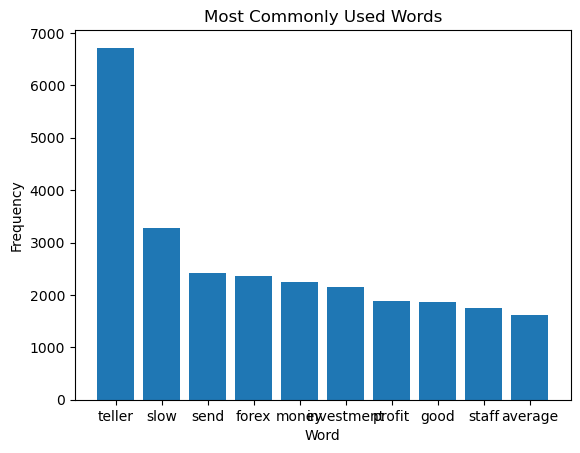

In [30]:
top_words = word_counts.most_common(10) 
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# performing a sentiment analysis 

In [31]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


1. Sentiment polarity function 

In [32]:
from textblob import TextBlob

In [33]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.3:
        return 'positive'
    elif polarity <0.3:
        return 'negative'
    else:
        return 'neutral'
    

In [34]:
data['sentiment'] = data['text'].apply(get_sentiment)

2. Sentiment count distriution 

In [35]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

negative    8162
positive    1293
neutral       85
Name: sentiment, dtype: int64


3. Plot of the sentiment count distribution 

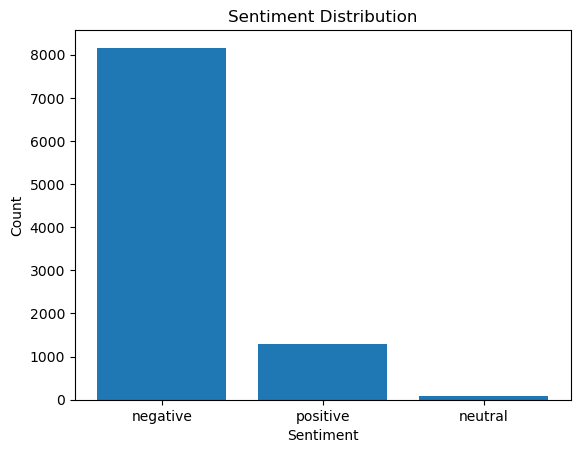

In [36]:
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Model evaluation 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [38]:
data.head()

,text,sentiment
0,rt celebrate dynamic gmd ceo dr ebenezer onyea...,positive
1,rt believe simply visit information zenithbank...,negative
2,rt believe simply visit information zenithbank...,negative
3,rt believe simply visit information zenithbank...,negative
4,believe simply visit information zenithbank we...,negative


In [39]:
X=data["text"]
y=data["sentiment"]

In [40]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [41]:
# Creating a pipeline for each model 

1. Naive Bayes Classifier 

In [42]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])

In [43]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [44]:
nb_pred = nb.predict(X_test)

In [45]:
nb_acc = accuracy_score(y_test, nb_pred)
print(f'Naive Bayes Accuracy: {nb_acc}')

Naive Bayes Accuracy: 0.8757861635220126


In [46]:
y_test_binary = label_binarize(y_test, classes=logreg.classes_)
y_score = nb.predict_proba(X_test)
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
auc_micro = roc_auc_score(y_test_binary, y_score, multi_class='ovr', average='micro')
auc_macro = roc_auc_score(y_test_binary, y_score, multi_class='ovr', average='macro')
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='b', lw=2, label='ROC curve (micro) (area = {:.2f})'.format(auc_micro))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Averaging)')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores
print("ROC AUC (Micro-Averaging): {:.2f}".format(auc_micro))
print("ROC AUC (Macro-Averaging): {:.2f}".format(auc_macro))

NameError: name 'label_binarize' is not defined

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

2. Logistic Regression model 

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
logreg_pred = logreg.predict(X_test)

In [ ]:
logreg_acc = accuracy_score(y_test, logreg_pred)

In [ ]:
print(f'Logistic Regression Accuracy: {logreg_acc}')

In [ ]:
from sklearn.preprocessing import label_binarize
y_test_binary = label_binarize(y_test, classes=logreg.classes_)
y_score = logreg.predict_proba(X_test)
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
auc_micro = roc_auc_score(y_test_binary, y_score, multi_class='ovr', average='micro')
auc_macro = roc_auc_score(y_test_binary, y_score, multi_class='ovr', average='macro')
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='b', lw=2, label='ROC curve (micro) (area = {:.2f})'.format(auc_micro))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-Averaging)')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC scores
print("ROC AUC (Micro-Averaging): {:.2f}".format(auc_micro))
print("ROC AUC (Macro-Averaging): {:.2f}".format(auc_macro))

3. Support Vector Machines 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(SVC(kernel='linear')))])

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_acc}')

In [ ]:
# Comparing the accuracy of the models 

In [ ]:
models = ['Support Vector Machines','Naive Bayes Classifier','Logistic Regression']
accuracies = [91.0,73.7,87.5]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(models, accuracies, color='b')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 100])
ax.set_title('Comparison of Accuracy Scores for the three Models')
for i, v in enumerate(accuracies):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)